In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()
print(df)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [42]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [43]:
dataset.columns = df.feature_names
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [44]:
X = dataset #independent var
y = df.target #dependent var

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [47]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [50]:
regression.fit(X_train,y_train)

LinearRegression()

In [51]:
reg_pred=regression.predict(X_test)

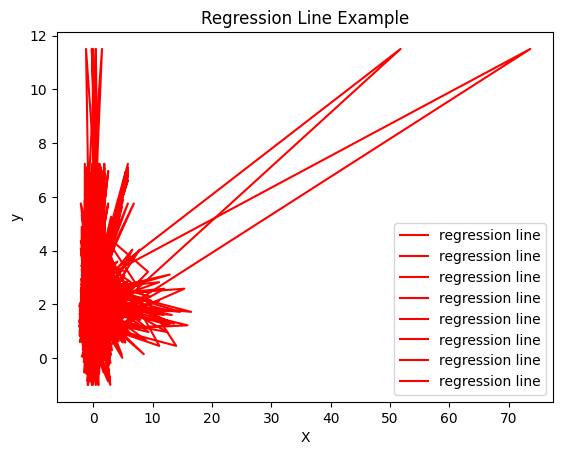

In [54]:
# plt.scatter(X_train, y_train, color='blue', label='Data points')  # Scatter plot of the data 
plt.plot(X_test, reg_pred, color = 'red', label = 'regression line')# Regression line
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Line Example')
plt.legend()
plt.show()

In [53]:
print(len(y_train), len(X_train))

14448 14448


In [19]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, reg_pred)
print(mae)

0.5272474538305952


In [20]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
print(np.mean(mse))

-0.5257104326777


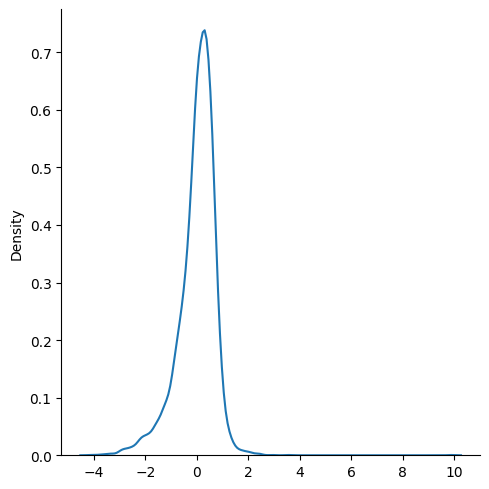

In [21]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')